In [2]:
import numpy as np
import matplotlib.pyplot as plt

group = np.array([[1.0, 2.0], [1.2, 0.1], [0.1, 1.4], [0.3, 3.5], [1.1, 1.0], [0.5, 1.5]])
labels = np.array(['A', 'A', 'B', 'B', 'A', 'B'])
group[labels == 'A', 1] # A

array([2. , 0.1, 1. ])

In [3]:
group[labels == 'A', 1] 

array([2. , 0.1, 1. ])

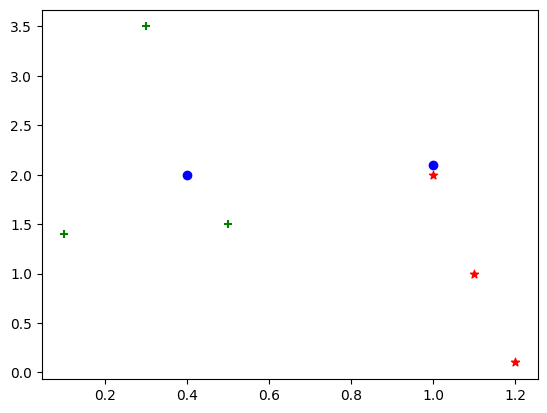

In [50]:
plt.scatter(group[labels == 'A', 0], group[labels == 'A', 1], color='r', marker='*')
plt.scatter(group[labels == 'B', 0], group[labels == 'B', 1], color='g', marker='+')
plt.scatter(1.0, 2.1, color='b', marker='o')
plt.scatter(0.4, 2.0, color='b', marker='o')


In [7]:
num_test = np.array([[1.0, 2.1], [0.4, 2.0]]).shape[0]
num_test


2

In [78]:
import operator
x_train = group
y_train = labels
x_test = np.array([[1.0, 2.1], [0.4, 2.0]])
label_list = []
for i in range(num_test):
    # 将测试数据复制为多份,方便直接利用矩阵进行快速计算
    x_test_temp = np.tile(x_test[i], (x_train.shape[0], 1))
    print('x_test_temp生成的x测试数据',x_test_temp)
    
    result_temp = (x_train - x_test_temp) ** 2
    # axis=1 计算的是行的和，结果以列展示\
    print('result_temp差的平方',result_temp)
    
    result_sum_temp = result_temp.sum(axis=1)
    print('result_temp求和',result_temp)
    # 最后再求平方根
    distances = np.sqrt(result_sum_temp)
    
    '''argsort选取距离最小的k个点'''
    
    nearest_k = distances.argsort()
    print('nearest_k',nearest_k)
    top_k = nearest_k[:1]
    print('top_k',top_k)
    class_count = {}
    for index in top_k:
        class_count[y_train[index]] = class_count.get(y_train[index], 0) + 1
        
    sorted_class_count = sorted(class_count.items(), key=operator.itemgetter(1), reverse=True)
    label_list.append(sorted_class_count[0][0])


x_test_temp生成的x测试数据 [[1.  2.1]
 [1.  2.1]
 [1.  2.1]
 [1.  2.1]
 [1.  2.1]
 [1.  2.1]]
result_temp差的平方 [[0.   0.01]
 [0.04 4.  ]
 [0.81 0.49]
 [0.49 1.96]
 [0.01 1.21]
 [0.25 0.36]]
result_temp求和 [[0.   0.01]
 [0.04 4.  ]
 [0.81 0.49]
 [0.49 1.96]
 [0.01 1.21]
 [0.25 0.36]]
nearest_k [0 5 4 2 3 1]
top_k [0]
x_test_temp生成的x测试数据 [[0.4 2. ]
 [0.4 2. ]
 [0.4 2. ]
 [0.4 2. ]
 [0.4 2. ]
 [0.4 2. ]]
result_temp差的平方 [[0.36 0.  ]
 [0.64 3.61]
 [0.09 0.36]
 [0.01 2.25]
 [0.49 1.  ]
 [0.01 0.25]]
result_temp求和 [[0.36 0.  ]
 [0.64 3.61]
 [0.09 0.36]
 [0.01 2.25]
 [0.49 1.  ]
 [0.01 0.25]]
nearest_k [5 0 2 4 3 1]
top_k [5]


In [79]:
label_list

[np.str_('A'), np.str_('B')]